[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omp96\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omp96\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Column names in the dataset: Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN

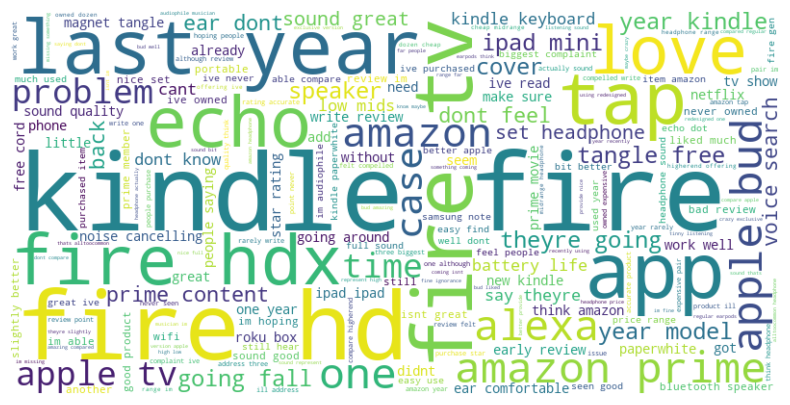

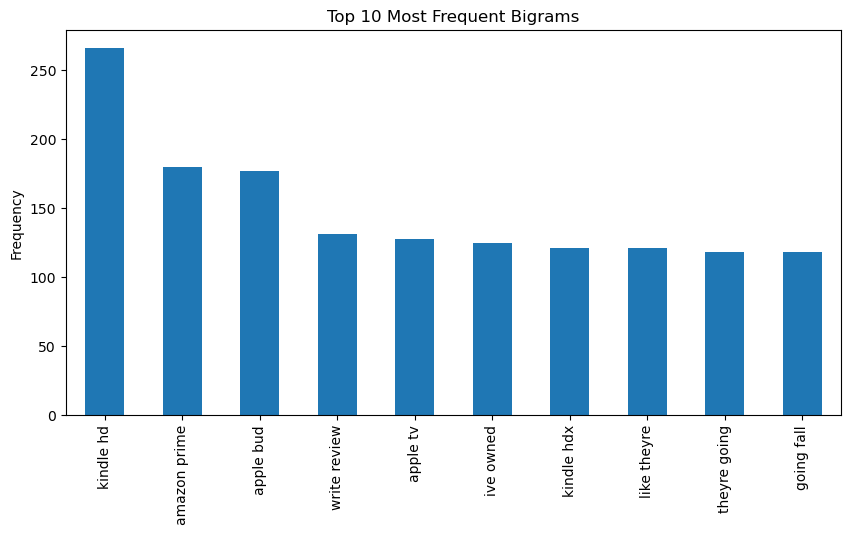

ValueError: Image size of 138120x457 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

Features (X) shape: (1597, 1000)
Target (y) shape: (1597,)


In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


# Load the dataset
df = pd.read_csv('C:/Users/omp96/Amazon/7817_1.csv')

# Print the column names to find the correct one for text data
print("Column names in the dataset:", df.columns)

# Assuming the column containing reviews is called 'text' (modify if needed)
# Inspect the first few rows to check the content of columns
print(df.head())

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean reviews: Remove special characters, stopwords, and apply lemmatization
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the correct text column
df['cleaned_reviews'] = df['reviews.text'].apply(clean_text)  # Replace 'text' with the actual column name if it's different

# Check for missing data and drop rows with missing reviews
df.isnull().sum()
df = df.dropna(subset=['cleaned_reviews'])

# Exploratory Data Analysis (EDA)

# Word Cloud Visualization
text = ' '.join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-Gram Frequency Plot (Bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
ngram_matrix = vectorizer.fit_transform(df['cleaned_reviews'])

# Get top 10 most frequent bigrams
ngram_sum = ngram_matrix.sum(axis=0).A1
ngram_freq = pd.DataFrame(ngram_sum, index=vectorizer.get_feature_names_out(), columns=["count"])
ngram_freq = ngram_freq.sort_values('count', ascending=False).head(10)

# Plot bigrams
ngram_freq.plot(kind='bar', figsize=(10, 5), legend=False)
plt.title("Top 10 Most Frequent Bigrams")
plt.ylabel("Frequency")
plt.show()

# Sentiment Distribution (assuming 'rating' column exists)
sns.countplot(x='reviews.text', data=df)
plt.title("Distribution of Ratings")
plt.show()

# Feature Engineering: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])

# Assuming 'rating' is the target variable
X = X_tfidf  # TF-IDF vectors as features
y = df['reviews.rating']  # Target variable (ratings or sentiment)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check final shapes of features and target
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


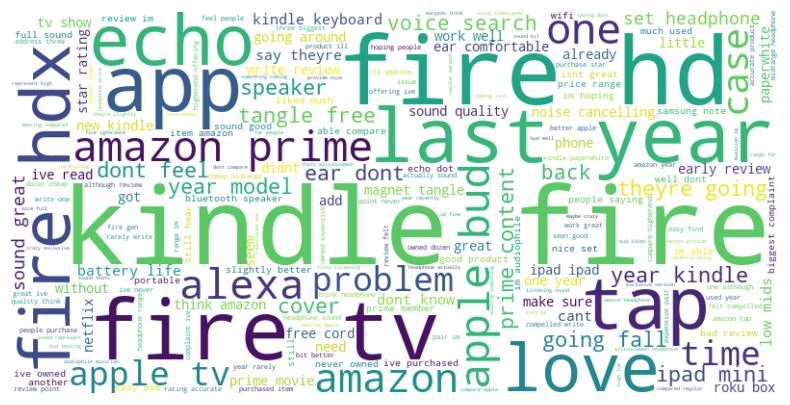

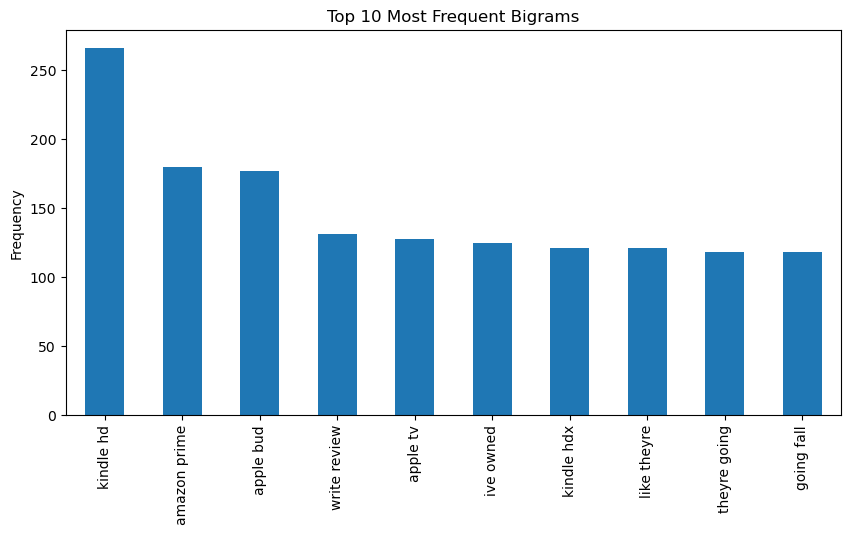

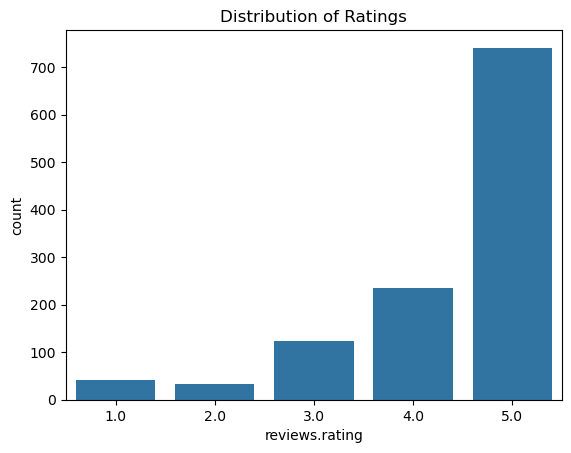

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = ' '.join(df['cleaned_reviews'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
ngram_matrix = vectorizer.fit_transform(df['cleaned_reviews'])

# Get top 10 most frequent bigrams
ngram_sum = ngram_matrix.sum(axis=0).A1
ngram_freq = pd.DataFrame(ngram_sum, index=vectorizer.get_feature_names_out(), columns=["count"])
ngram_freq = ngram_freq.sort_values('count', ascending=False).head(10)

# Plot bigrams
ngram_freq.plot(kind='bar', figsize=(10, 5), legend=False)
plt.title("Top 10 Most Frequent Bigrams")
plt.ylabel("Frequency")
plt.show()

import seaborn as sns

# Assuming 'rating' column exists (if not, you can create a binary sentiment column)
sns.countplot(x='revrating', data=df)
plt.title("Distribution of Ratings")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])

# Assuming 'rating' is the target variable
X = X_tfidf  # Use the TF-IDF vectors as features
y = df['reviews.rating']  # Target variable (ratings or sentiment)